# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.01.05

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_1\20211229-P_brain_M1_nonclear


In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

25424


# 0. fov parameters

In [4]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229',
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229',
             'experiment_type': 'DNA',
             'num_threads': 10,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


In [5]:
_overwrite = False
sel_fov_ids = np.arange(1, 2)

for _fov_id in sel_fov_ids:

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 64
- Number of field of views: 159
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C23_restain', 'H51U1', 'H52U2', 'H53U3', 'H54U4', 'H55U5', 'H56U6', 'H57U7', 'H58U8', 'H59U9', 'H60U10', 'H61U11', 'H62U12', 'H63U13', 'H64U14'])
- 64 folders are found according to color-usage annotation.
++ load bl

  91  92  93  94  95  96  97  98  99 145] , finish in 7661.83s.
-- folders not selected, allow processing all 64 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H0C1\Conv_zscan_001.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H0C1\Conv_zscan_001.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H0C1\Conv_zscan_001.dax [2]
[2]
 in 5.207s
-- removing hot pixels for channels:['561'] in 4.862s
-- correct Z-shifts for channels:['561'] in 4.712s
-- illumination correction for channels: 561, in 1.552s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.787s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5


E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:286: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


1581 fitted in 105.302s.
-- start fitting spots in channel:647, 1515 seeded, 1515 fitted in 103.963s.
- writting unique spots into file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
-- updated spots for id:[1, 2] in 0.041s
+ batch process image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H52U2\Conv_zscan_001.dax for channels:['750', '647']
- loading unique info from file:Conv_zscan_001.hdf5 in 0.172s.
-- ['750', '647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H52U2\Conv_zscan_001.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H52U2\Conv_zscan_001.dax [0, 1, 2]
[0, 1, 2]
 in 3.773s
-- removing hot pixels for channels:['750', '647', '561'] in 13.25

E:\Users\puzheng\anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1125 fitted in 91.375s.
-- start fitting spots in channel:647, 4281 seeded, 4281 fitted in 225.224s.
- writting unique spots into file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
-- resize unique_spots and unique_raw_spots from 4000 to 4281.
-- updated spots for id:[3, 4] in 0.038s
+ batch process image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H54U4\Conv_zscan_001.dax for channels:['750', '647']
- loading unique info from file:Conv_zscan_001.hdf5 in 0.168s.
-- ['750', '647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H54U4\Conv_zscan_001.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H54U4\Conv_zscan_001.dax [0, 1, 2]
[0, 1, 2]
 in 4.925s
-- r

-- applying gaussian highpass filte, sigma=5 in 33.581s
-- finish correction in 93.516s
- writting unique info to file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
-- updated ims for id:[13, 14], drifts for id:[13, 14] in 2.672s
-- update drift of H57U7\Conv_zscan_001.dax into file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\Analysis\drift\Conv_zscan_001_current_cor.pkl
-- start fitting spots in channel:750, 1218 seeded, 1218 fitted in 90.751s.
-- start fitting spots in channel:647, 2799 seeded, 2799 fitted in 162.966s.
- writting unique spots into file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
-- updated spots for id:[13, 14] in 0.034s
+ batch process image: \\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\H58U8\Conv_zscan_001.dax for channels:['750', '647']
- loading unique info from file:Conv_zscan_001.hdf5 in 0.170s.
-- ['750', '647'] images are re

--- align image 0 in 5.685s.
--- align image 1 in 5.589s.
--- align image 2 in 5.664s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -1.     1.49 -56.14] in 17.082s
-- generate translation function for chromatic correction for channels: ['750'] and drift:[ -1.     1.49 -56.14] in 0.000s
-- applying gaussian highpass filte, sigma=5 in 33.765s
-- finish correction in 94.010s
- writting unique info to file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
-- updated ims for id:[21, 22], drifts for id:[21, 22] in 2.660s
-- update drift of H61U11\Conv_zscan_001.dax into file:\\10.245.74.158\Chromatin_NAS_1\20220102-CTP11-1000_CTP12-DNA_from_1229\Analysis\drift\Conv_zscan_001_current_cor.pkl
-- start fitting spots in channel:750, 734 seeded, 734 fitted in 70.785s.
-- start fitting spots in channel:647, 5205 seeded, 5205 fitted in 269.024s.
- writting unique spots into file:\\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP1

-- finish correction in 15.421s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_001.hdf5
++ base attributes saved:['dapi_im'] in 5.132s.


In [7]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    #combo_ids = _grp['ids'][:]

<IPython.core.display.Javascript object>


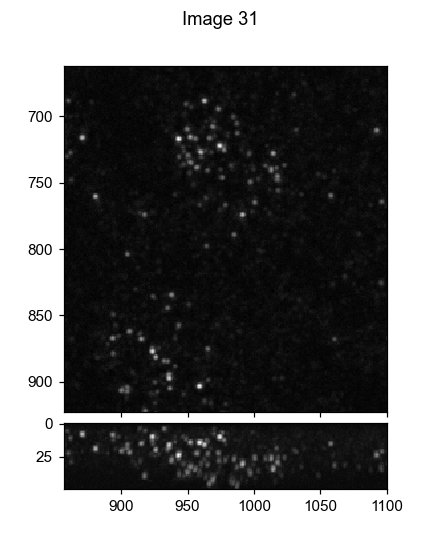

In [8]:
visual_tools.imshow_mark_3d_v2(combo_ims)

In [6]:
from ImageAnalysis3.classes.preprocess import Spots3D, ImageCrop_3d, SpotTuple

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ids = _grp['ids'][:]
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits= _id)
                                    for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

<IPython.core.display.Javascript object>


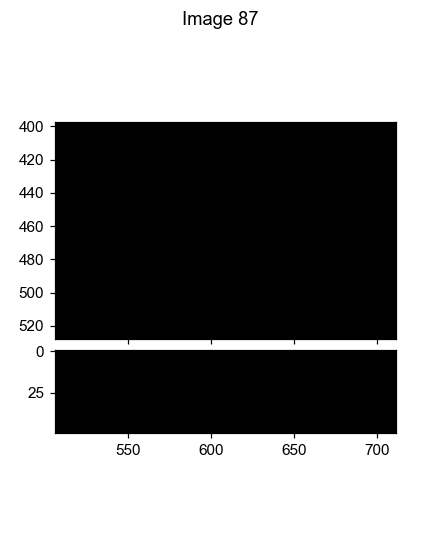

In [7]:
spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }

for _i,_spots in enumerate(raw_combo_spots_list):
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    #spots_imshow_dict['class_ids'].extend(list(_spots.bits))
    spots_imshow_dict['class_ids'].extend(list(_i * np.ones(len(_spots), dtype=np.int32)))

visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict)

In [13]:
fov._load_from_file('combo')

+ loading combo from file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_000.hdf5
++ finish loading combo in 0.290s. 


<IPython.core.display.Javascript object>


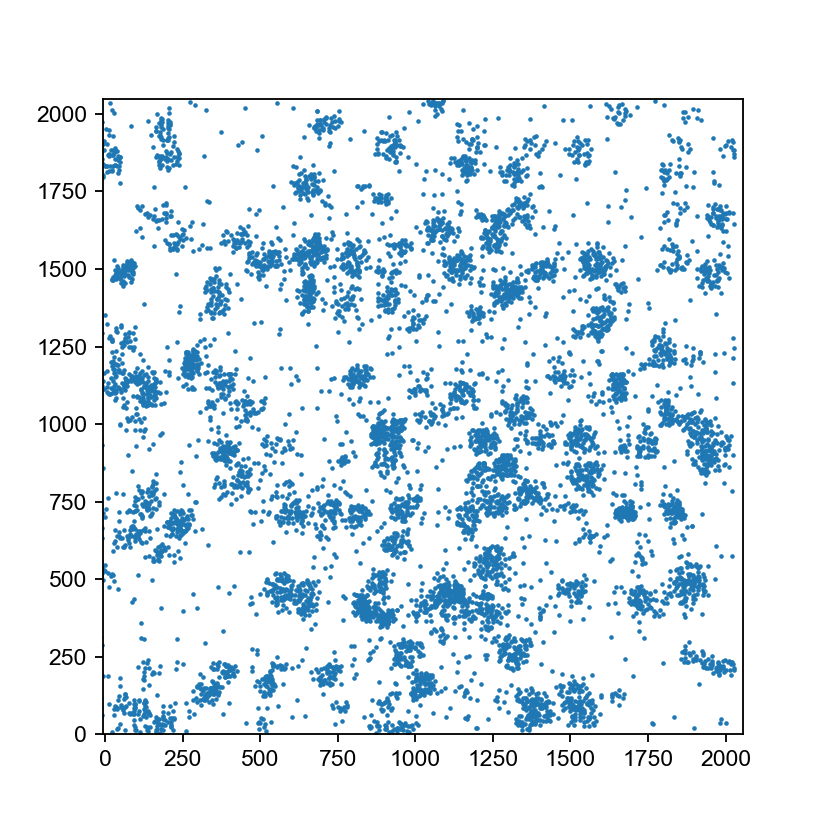

(8083, 8089)

In [14]:
plt.figure(figsize=(5,5),dpi=150)
spots = fov.combo_spots_list[3]
sel_inds = spots[:,0] > 2500
plt.scatter(spots[sel_inds,3], spots[sel_inds,2], s=1)
plt.axis('equal')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.show()
np.sum(sel_inds), len(sel_inds)

In [18]:
_spots = fov.combo_spots_list[0]

np.fliplr(_spots[:,1:4])

array([[1789.5247  ,  385.87903 ,   34.284603],
       [1793.5173  ,  382.88458 ,   44.16711 ],
       [1766.4695  ,  405.92477 ,   43.181324],
       ...,
       [1542.2552  ,  938.9768  ,   26.992361],
       [ 157.19456 , 1097.7567  ,   16.8031  ],
       [1252.3534  ,  543.1731  ,   10.336489]], dtype=float32)

In [ ]:
spots_dict = {'coords':[np.flipud(_spots) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

<IPython.core.display.Javascript object>


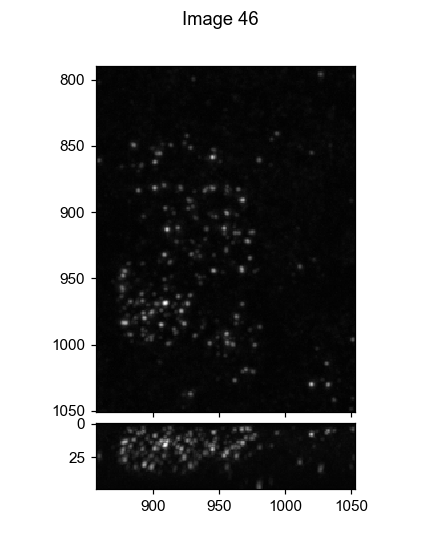

In [10]:
visual_tools.imshow_mark_3d_v2(combo_ims)